### Hipótese 3 (E3)

#### É possível predizer a plataforma de um game baseado em suas vendas?

In [105]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

In [106]:
game = pd.read_csv('vgsales.csv', sep=',', encoding='utf-8')

In [107]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [108]:
X = game.iloc[:, 6:11].values  
y = game.iloc[:, 2].values 

In [109]:
X

array([[4.149e+01, 2.902e+01, 3.770e+00, 8.460e+00, 8.274e+01],
       [2.908e+01, 3.580e+00, 6.810e+00, 7.700e-01, 4.024e+01],
       [1.585e+01, 1.288e+01, 3.790e+00, 3.310e+00, 3.582e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-02],
       [0.000e+00, 1.000e-02, 0.000e+00, 0.000e+00, 1.000e-02],
       [1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-02]])

In [110]:
y

array(['Wii', 'NES', 'Wii', ..., 'PS2', 'DS', 'GBA'], dtype=object)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [112]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [113]:
X_train

array([[-0.0011734 , -0.27255509, -0.25485576, -0.09703137, -0.14818794],
       [-0.08280724, -0.19397542, -0.25485576, -0.19847882, -0.17942398],
       [-0.19942701, -0.15468559, -0.25485576, -0.1477551 , -0.22315443],
       ...,
       [-0.3043848 , -0.27255509, -0.25485576, -0.24920254, -0.32935697],
       [-0.3043848 , -0.27255509, -0.25485576, -0.24920254, -0.32310976],
       [-0.31604678, -0.2922    ,  0.03905363, -0.24920254, -0.28562651]])

In [114]:
X_test

array([[-0.31604678, -0.2922    ,  0.52890262, -0.24920254, -0.19191839],
       [ 0.10378439,  0.45430681, -0.25485576, -0.09703137,  0.13293643],
       [-0.31604678, -0.2922    ,  0.23499323, -0.24920254, -0.24814327],
       ...,
       [-0.31604678, -0.2922    , -0.09157276, -0.24920254, -0.31061535],
       [ 0.53527755,  0.00247374, -0.25485576,  0.30875841,  0.27662222],
       [-0.22275096, -0.23326525, -0.25485576, -0.24920254, -0.26688489]])

In [115]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [116]:
y_pred = classifier.predict(X_test)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 25   0   0   1   0   0   0   0   1   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0  14   0  38   1   3   0   0   2   1   0  11   6  12   8   0   4   0
    1   0   2   0  10   1   4   0   1]
 [  1   0   0   6   0   0   0   0   0   0   0   0   0   1   3   0   2   0
    0   0   0   0   0   0   0   0   0]
 [  2  22   0 201   2   8   3   0   2   0   0  25   3  28  16   0  24   0
    1   0   3   0  57   0  34   4   1]
 [  0   2   0   5   2   0   1   0   1   2   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  1   3   0   5   1 107  17   0   1   0   0   0   2   4   1   0   2   0
    0   0   1   0   0   0   0  19   0]
 [  0   5   0   5   1  17  64   0   2   2   0   0   1   1   0   0   0   0
    0   0   0   0   0   0   0  13   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   1   2   1   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  5   1   0   5   2   6   8   0  29   0   0   1   2   3   0   0   1   1
    0   0   1   0   0 

/home/matheus/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
error = []

In [119]:
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i == y_test))

In [120]:
error

[0.4105421686746988,
 0.41536144578313255,
 0.4135542168674699,
 0.4274096385542169,
 0.43343373493975906,
 0.4286144578313253,
 0.4295180722891566,
 0.43283132530120483,
 0.43704819277108437,
 0.43644578313253013,
 0.44246987951807226,
 0.4346385542168675,
 0.4322289156626506,
 0.43644578313253013,
 0.43644578313253013,
 0.4316265060240964,
 0.43734939759036146,
 0.4358433734939759,
 0.425,
 0.42771084337349397,
 0.4307228915662651,
 0.42620481927710846,
 0.42891566265060244,
 0.42620481927710846,
 0.42680722891566264,
 0.4274096385542169,
 0.42771084337349397,
 0.4256024096385542,
 0.42530120481927713,
 0.4271084337349398,
 0.4259036144578313,
 0.42289156626506025,
 0.4210843373493976,
 0.4234939759036145,
 0.42289156626506025,
 0.4198795180722892,
 0.41807228915662653,
 0.4177710843373494,
 0.4246987951807229,
 0.42259036144578316,
 0.4198795180722892,
 0.422289156626506,
 0.42289156626506025,
 0.42319277108433734,
 0.41807228915662653,
 0.41927710843373495,
 0.4198795180722892,
 0.

Text(0,0.5,'Media de Acerto')

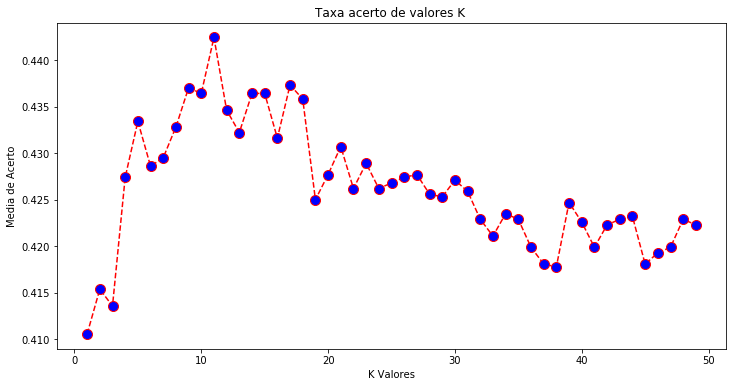

In [121]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Taxa acerto de valores K ')  
plt.xlabel('K Valores')  
plt.ylabel('Media de Acerto')

### Conclusão

O melhor resultado que obtemos foi quando se estabelecem algo próximo à 12 vizinhos, tendo uma taxa de acerto média por volta dos 45%. Porém esse valor é baixo e a hipótese acabou sendo refutada, ou seja, não é possível classificar a plataforma de um jogo com precisão baseado apenas nas suas vendas.